# 3.5 Classifying newswires: a multiclass classification example
    you’ll build a network to classify Reuters newswires into 46 mutually exclusive topics
    multi-class classification
    single-label, multiclass classification.
    If each data point could belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.
## 3.5.1 The Reuters dataset
    publish in 1986
    there are 46 differents topics
    this is available in keras datasets
#### Listing 3.12 Loading the Reuters dataset

In [1]:
from  keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 87aedbeb0cb229e378797a632c1997b6 so we will re-download the data.
2113536/2110848 [==============================] - 442s 209us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[2]

[1,
 53,
 12,
 284,
 15,
 14,
 272,
 26,
 53,
 959,
 32,
 818,
 15,
 14,
 272,
 26,
 39,
 684,
 70,
 11,
 14,
 12,
 3886,
 18,
 180,
 183,
 187,
 70,
 11,
 14,
 102,
 32,
 11,
 29,
 53,
 44,
 704,
 15,
 14,
 19,
 758,
 15,
 53,
 959,
 47,
 1013,
 15,
 14,
 19,
 132,
 15,
 39,
 965,
 32,
 11,
 14,
 147,
 72,
 11,
 180,
 183,
 187,
 44,
 11,
 14,
 102,
 19,
 11,
 123,
 186,
 90,
 67,
 960,
 4,
 78,
 13,
 68,
 467,
 511,
 110,
 59,
 89,
 90,
 67,
 1390,
 55,
 2678,
 92,
 617,
 80,
 1274,
 46,
 905,
 220,
 13,
 4,
 346,
 48,
 235,
 629,
 5,
 211,
 5,
 1118,
 7,
 2,
 81,
 5,
 187,
 11,
 15,
 9,
 1709,
 201,
 5,
 47,
 3615,
 18,
 478,
 4514,
 5,
 1118,
 7,
 232,
 2,
 71,
 5,
 160,
 63,
 11,
 9,
 2,
 81,
 5,
 102,
 59,
 11,
 17,
 12]

#### Here’s how you can decode it back to words, in case you’re curious.

### Listing 3.13 Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
word_index

557056/550378 [==============================] - 74s 133us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [7]:
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') 
     for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
import numpy as np

np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

## 3.5.2 Preparing the data
#### You can vectorize the data with the exact same code as in the previous example.

### Listing 3.14 Encoding the data

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Change label with one-hot-encode

In [11]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Listing 3.15 Model definition

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3.5.4 Validating your approach
#### Let’s set apart 1,000 samples in the training data to use as a validation set

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Listing 3.18 Training the model
#### Now, let’s train the network for 20 epochs.

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 673us/step - loss: 2.5235 - acc: 0.4960 - val_loss: 1.7197 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 3s 315us/step - loss: 1.4464 - acc: 0.6879 - val_loss: 1.3495 - val_acc: 0.7050
Epoch 3/20
7982/7982 [==============================] - 3s 350us/step - loss: 1.0969 - acc: 0.7641 - val_loss: 1.1736 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 2s 310us/step - loss: 0.8702 - acc: 0.8165 - val_loss: 1.0808 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 3s 340us/step - loss: 0.7031 - acc: 0.8493 - val_loss: 0.9854 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 3s 316us/step - loss: 0.5664 - acc: 0.8800 - val_loss: 0.9393 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 310us/step - loss: 0.4584 - acc: 0.9049 - val_loss: 0.9084 - val_acc: 0.8010


### And finally, let’s display its loss and accuracy curves (see figures 3.9 and 3.10).

### Listing 3.19 Plotting the training and validation loss

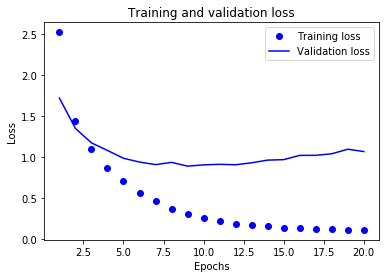

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Listing 3.20 Plotting the training and validation accuracy

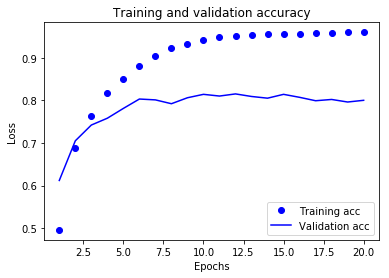

In [18]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Listing 3.21 Retraining a model from scratch

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 414us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 3s 417us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 3s 341us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 3s 331us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 3s 346us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 3s 344us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 3s 382us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [20]:
results

[1.022207977935234, 0.77560106861941647]

In [21]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.182546749777382

### 3.5.5 Generating predictions on new data
#### Listing 3.22 Generating predictions for new data

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
predictions[4]

array([  1.09055954e-05,   3.33870249e-03,   1.32153989e-04,
         1.35078444e-03,   7.67480931e-04,   1.27232180e-03,
         7.50792969e-05,   7.41447511e-05,   1.70321964e-05,
         5.32765815e-04,   2.46593216e-03,   1.20130135e-04,
         1.77064921e-05,   9.45231676e-01,   3.40503780e-03,
         3.83956241e-04,   2.51042191e-02,   5.01796196e-04,
         4.48203973e-05,   1.90968974e-04,   2.15054515e-05,
         1.98477010e-05,   3.30682560e-05,   2.01016059e-03,
         5.69893746e-04,   2.68083159e-03,   2.20946495e-05,
         3.26467562e-04,   2.29953206e-03,   1.20289087e-05,
         5.15162072e-04,   2.40266253e-03,   1.76143585e-04,
         5.94033809e-05,   2.58855416e-05,   8.30801309e-06,
         1.52680062e-04,   2.28572142e-04,   2.62834656e-04,
         3.04503570e-04,   5.57070598e-04,   2.14794534e-03,
         7.24644997e-05,   2.11197494e-05,   1.27336261e-05,
         1.95631856e-05], dtype=float32)